Import Libraries

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import folium

In [245]:
# read csv file and save into dataframe df
df = pd.read_csv("Airbnb Listings Bangkok Clean.csv")
df.head()

,Unnamed: 0,id,host_id,neighbourhood,region,room_type,price,minimum_nights,reviews_count_bc,reviews_activity,reviews_month_bc,reviews_engagement
0,0,27934,120437,Ratchathewi,Central,Entire home/apt,1905,3,2.928458,High,0.301359,Moderate
1,1,959254,5153476,Khlong Toei,Central,Entire home/apt,1400,30,0.000000,Low,0.000000,Low
2,2,1791481,9399478,Khlong Toei,Central,Entire home/apt,1577,30,3.010781,High,0.381783,High
3,3,1793000,9407280,Vadhana,Central,Entire home/apt,5034,21,3.529709,High,0.557674,High
4,4,1808600,9478184,Khlong Toei,Central,Entire home/apt,2078,60,3.038267,High,0.374712,High


Text(0.5, 1.0, 'Mean Price of Room Types by Region')

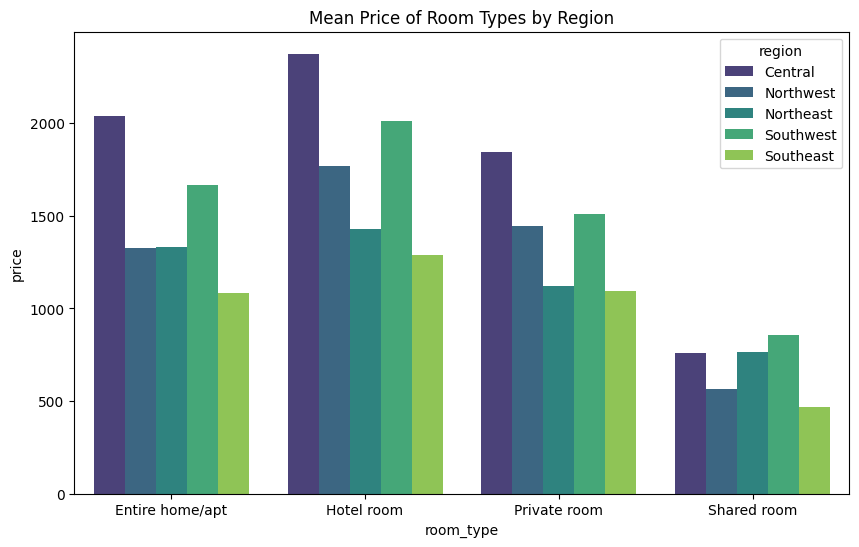

In [246]:
# bar graph showing the difference in price for each room_type in the different regions
plt.figure(figsize=(10, 6))
sns.barplot(x = "room_type", y = "price", data = df, hue = "region", estimator=np.mean, errorbar= None, palette="viridis")
plt.title("Mean Price of Room Types by Region")

In [247]:
df["reviews_activity"] = pd.Categorical(
    df["reviews_activity"],
    categories=["Low", "Moderate", "High"],
    ordered=True
)

In [248]:
# # separate dataframes into different room_type
# eha_df = df[df["room_type"] == "Entire home/apt"]
# hr_df = df[df["room_type"] == "Hotel room"]
# pr_df = df[df["room_type"] == "Private room"]
# sr_df = df[df["room_type"] == "Shared room"]

summary statistics for price across each reviews_activity category

In [249]:
# descriptive statistics
df.groupby(["room_type", "reviews_activity"])["price"].describe()

C:\Users\amfed\AppData\Local\Temp\ipykernel_6600\1330745961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["room_type", "reviews_activity"])["price"].describe()


count         mean          std    min  \
room_type       reviews_activity                                            
Entire home/apt Low               3610.0  1651.878393  1001.439765  313.0   
                Moderate          2580.0  1587.387984   947.479722  346.0   
                High              3156.0  1728.653676  1000.882668  322.0   
Hotel room      Low                322.0  2058.251553  1302.924923    0.0   
                Moderate           192.0  2071.348958  1362.627946  360.0   
                High               247.0  1872.611336  1281.318237  350.0   
Private room    Low               1747.0  1555.101889   954.910159  278.0   
                Moderate           817.0  1379.436965   872.053218  300.0   
                High              1077.0  1313.522748   918.472703  304.0   
Shared room     Low                330.0   747.293939   449.440295  280.0   
                Moderate           132.0   685.575758   421.900103  295.0   
                High               177.0   606.570621   305.249948  313.0   

                                     25%     50%      75%     max  
room_type       reviews_activity                                   
Entire home/apt Low                900.0  1400.0  2078.00  5431.0  
                Moderate           930.0  1333.5  2000.00  5449.0  
                High              1000.0  1485.5  2124.00  5429.0  
Hotel room      Low               1118.5  1600.0  2735.00  6603.0  
                Moderate          1199.0  1600.0  2600.00  6513.0  
                High               979.0  1496.0  2329.00  6612.0  
Private room    Low                850.0  1280.0  2000.00  5800.0  
                Moderate           800.0  1100.0  1723.00  5500.0  
                High               700.0   990.0  1529.00  5800.0  
Shared room     Low                450.0   550.0   900.00  2340.0  
                Moderate           390.0   550.0   834.25  2300.0  
                High               400.0   486.0   735.00  1800.0

In [250]:
# average price by reviews activity
df.groupby(["room_type", "reviews_activity"])["price"].mean()

C:\Users\amfed\AppData\Local\Temp\ipykernel_6600\1152924905.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["room_type", "reviews_activity"])["price"].mean()


room_type        reviews_activity
Entire home/apt  Low                 1651.878393
                 Moderate            1587.387984
                 High                1728.653676
Hotel room       Low                 2058.251553
                 Moderate            2071.348958
                 High                1872.611336
Private room     Low                 1555.101889
                 Moderate            1379.436965
                 High                1313.522748
Shared room      Low                  747.293939
                 Moderate             685.575758
                 High                 606.570621
Name: price, dtype: float64

In [251]:
# create numerical values for the ordinal values in reviews_activity and reviews_engagement
df["reviews_activity_num"] = df["reviews_activity"].map({"Low": 1, "Moderate": 2, "High": 3})
df["reviews_activity_num"] = df["reviews_activity_num"].astype(int)

In [252]:
df["reviews_engagement_num"] = df["reviews_engagement"].map({"Low": 1, "Moderate": 2, "High": 3})

In [253]:
df = df[["id", "host_id", "neighbourhood", "region", "room_type", "price", "minimum_nights", "reviews_count_bc", "reviews_activity", "reviews_activity_num", "reviews_month_bc", "reviews_engagement", "reviews_engagement_num"]]

In [254]:
# revenue potential estimation
df["revenue_potential"] = df["price"] * df["reviews_activity_num"]

In [255]:
df.head()

,id,host_id,neighbourhood,region,room_type,price,minimum_nights,reviews_count_bc,reviews_activity,reviews_activity_num,reviews_month_bc,reviews_engagement,reviews_engagement_num,revenue_potential
0,27934,120437,Ratchathewi,Central,Entire home/apt,1905,3,2.928458,High,3,0.301359,Moderate,2,5715
1,959254,5153476,Khlong Toei,Central,Entire home/apt,1400,30,0.000000,Low,1,0.000000,Low,1,1400
2,1791481,9399478,Khlong Toei,Central,Entire home/apt,1577,30,3.010781,High,3,0.381783,High,3,4731
3,1793000,9407280,Vadhana,Central,Entire home/apt,5034,21,3.529709,High,3,0.557674,High,3,15102
4,1808600,9478184,Khlong Toei,Central,Entire home/apt,2078,60,3.038267,High,3,0.374712,High,3,6234


In [287]:
# average revenue_potential by room_type and region
df.groupby(["room_type", "region"])["revenue_potential"].median()

room_type        region   
Entire home/apt  Central      3513.0
                 Northeast    1800.0
                 Northwest    2068.0
                 Southeast    1700.0
                 Southwest    2574.0
Hotel room       Central      3600.0
                 Northeast    2000.0
                 Northwest    2550.0
                 Southeast    2101.0
                 Southwest    2627.0
Private room     Central      2500.0
                 Northeast    1500.0
                 Northwest    2379.0
                 Southeast    1500.0
                 Southwest    2000.0
Shared room      Central      1170.0
                 Northeast     829.0
                 Northwest     697.5
                 Southeast     600.0
                 Southwest    1146.0
Name: revenue_potential, dtype: float64

In [315]:
df.groupby(["room_type", "region"])["id"].count()

room_type        region   
Entire home/apt  Central      3810
                 Northeast    1865
                 Northwest     828
                 Southeast     970
                 Southwest    1873
Hotel room       Central       329
                 Northeast     103
                 Northwest     121
                 Southeast      52
                 Southwest     156
Private room     Central       983
                 Northeast     888
                 Northwest     573
                 Southeast     457
                 Southwest     740
Shared room      Central       177
                 Northeast      72
                 Northwest     216
                 Southeast      41
                 Southwest     133
Name: id, dtype: int64

Text(0.5, 1.0, 'Median Revenue Potential of Room Types by Region')

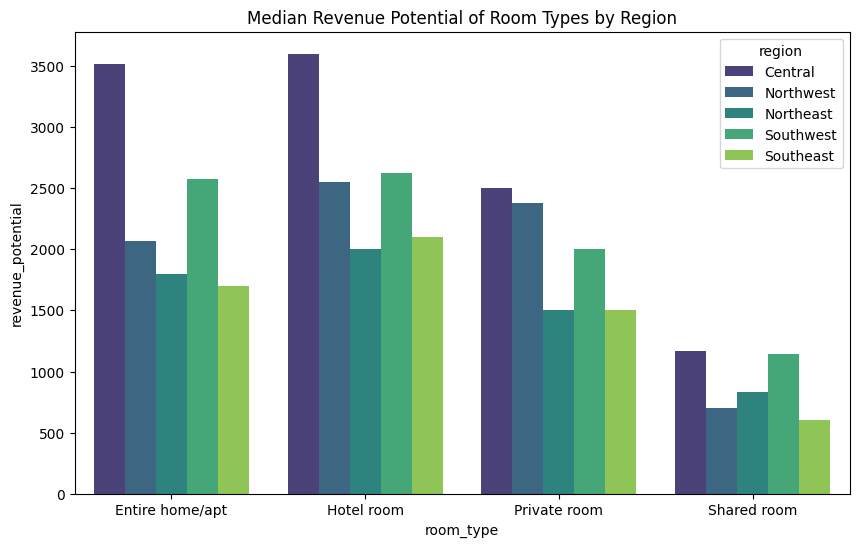

In [284]:
# bar graph showing the difference in revenue potential for each room_type in the different regions
plt.figure(figsize=(10, 6))
sns.barplot(x = "room_type", y = "revenue_potential", data = df, hue = "region", estimator=np.median, errorbar= None, palette="viridis")
plt.title("Median Revenue Potential of Room Types by Region")

### Inferential statistics - by room_type

Ho: there is *no significant difference* in revenue potential across regions for the specific room type
<br>
Ha: there is *siginificant difference* in revenue potential across regions for the specific room type
<br><br>
Statistical test: Kurskal wallis test
<br>
Because the distribution is not normal and logging/boxcox did not help normalising


Text(0.5, 1.0, 'Shared Room')

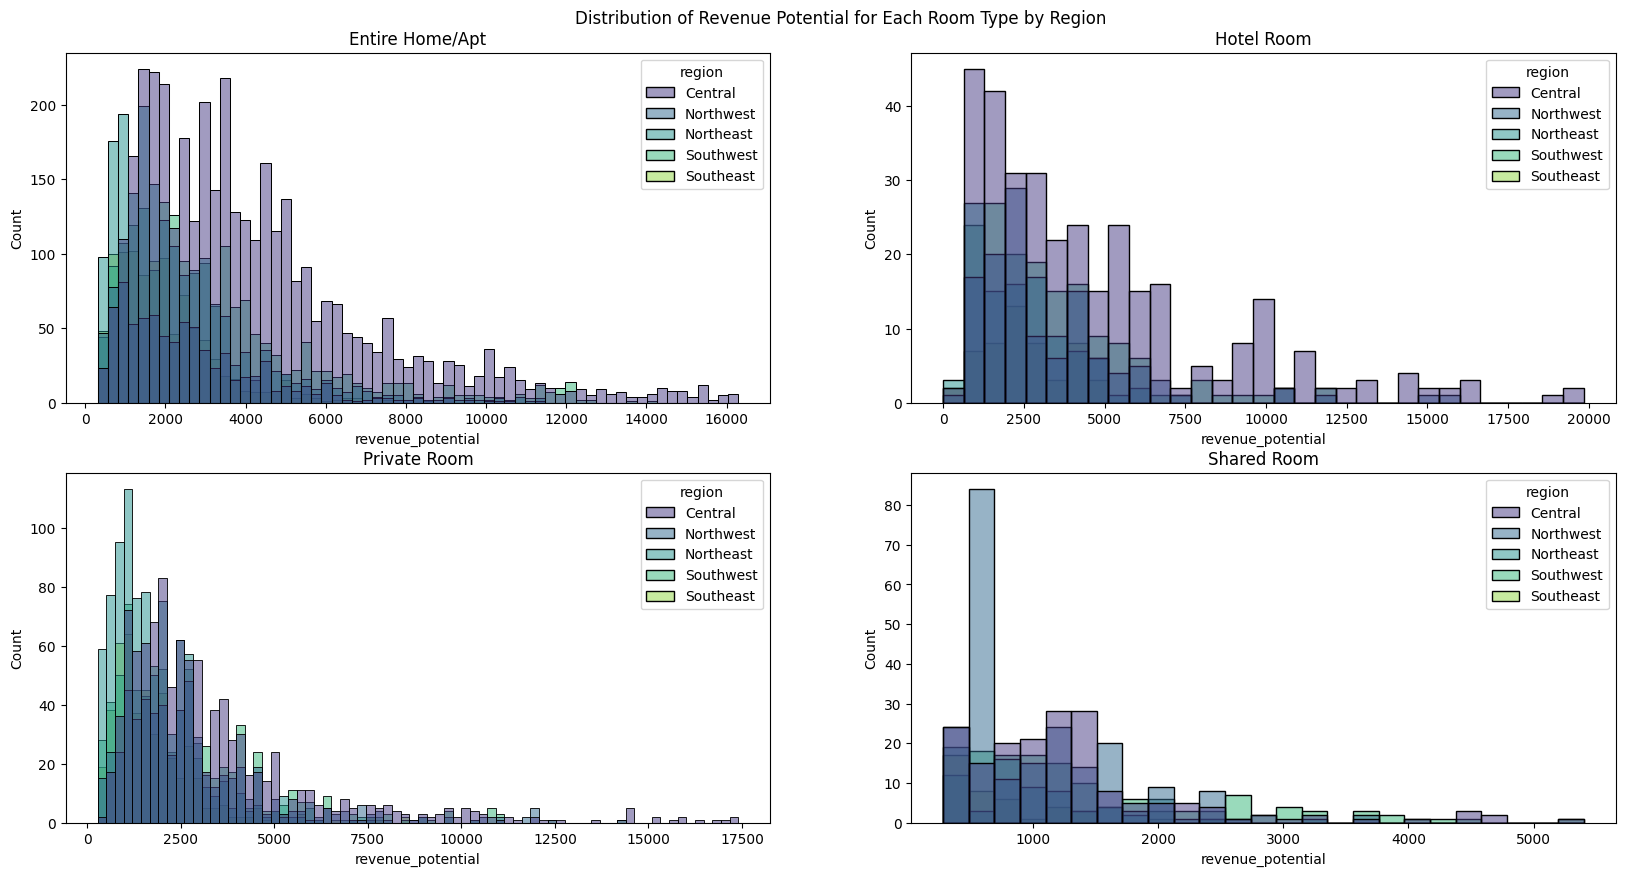

In [258]:
# histplot to see distribution of revenue potential
plt.figure(figsize=(20, 10))
plt.title("Distribution of Revenue Potential for Each Room Type by Region\n")
plt.box(on= None)
plt.axis("off")

plt.subplot(2, 2, 1)
sns.histplot(x = "revenue_potential", data = df[df["room_type"] == "Entire home/apt"], hue = "region", palette="viridis")
plt.title("Entire Home/Apt")

plt.subplot(2, 2, 2)
sns.histplot(x = "revenue_potential", data = df[df["room_type"] == "Hotel room"], hue = "region", palette="viridis")
plt.title("Hotel Room")

plt.subplot(2, 2, 3)
sns.histplot(x = "revenue_potential", data = df[df["room_type"] == "Private room"], hue = "region", palette="viridis")
plt.title("Private Room")

plt.subplot(2, 2, 4)
sns.histplot(x = "revenue_potential", data = df[df["room_type"] == "Shared room"], hue = "region", palette="viridis")
plt.title("Shared Room")

In [271]:
# test for normality
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import kruskal

In [274]:
room_types = df["room_type"].unique()
regions = df["region"].unique()

for room in room_types:
    for region in regions:
          subset = df[(df["room_type"] == room) & (df["region"] == region)]
          stat, p = shapiro(subset["revenue_potential"])
          print(f"Room Type: {room}, Region: {region}, P-Value: {p}")

# all pval falls under 0.05 --> none follows the normal distribution (except hotel room in southeast)


Room Type: Entire home/apt, Region: Central, P-Value: 9.55423557831046e-49
Room Type: Entire home/apt, Region: Northwest, P-Value: 1.013122975678248e-25
Room Type: Entire home/apt, Region: Northeast, P-Value: 8.574655418580596e-42
Room Type: Entire home/apt, Region: Southwest, P-Value: 4.909864507177628e-40
Room Type: Entire home/apt, Region: Southeast, P-Value: 8.391836244648111e-26
Room Type: Hotel room, Region: Central, P-Value: 3.808202211119599e-17
Room Type: Hotel room, Region: Northwest, P-Value: 7.852402405157741e-13
Room Type: Hotel room, Region: Northeast, P-Value: 0.00021031278275183252
Room Type: Hotel room, Region: Southwest, P-Value: 1.6237521761595434e-10
Room Type: Hotel room, Region: Southeast, P-Value: 0.06794193191883834
Room Type: Private room, Region: Central, P-Value: 1.2172938772422902e-35
Room Type: Private room, Region: Northwest, P-Value: 2.795554165220901e-25
Room Type: Private room, Region: Northeast, P-Value: 1.4935631376887515e-25
Room Type: Private room, 

In [262]:
# # logging
# df.loc[:, "log_rev_pot"] = np.log1p(df["revenue_potential"])

In [ ]:
# # test for normality after logging
# room_types = df["room_type"].unique()
# regions = df["region"].unique()

# for room in room_types:
#     for region in regions:
#           subset = df[(df["room_type"] == room) & (df["region"] == region)]
#           stat, p = shapiro(subset["log_rev_pot"])
#           print(f"Room Type: {room}, Region: {region}, P-Value: {p}")


In [ ]:
### logging didnt work

In [ ]:
# # use boxcox
# df.loc[:, "boxcox_rev_pot"], _ = stats.boxcox(df["revenue_potential"] + 1)

In [273]:
# # test for normality after boxcox
# room_types = df["room_type"].unique()
# regions = df["region"].unique()

# for room in room_types:
#     for region in regions:
#           subset = df[(df["room_type"] == room) & (df["region"] == region)]
#           stat, p = shapiro(subset["boxcox_rev_pot"])
#           print(f"Room Type: {room}, Region: {region}, P-Value: {p}")

In [ ]:
### boxcox didnt work

In [288]:
room_types = ["Entire home/apt", "Hotel room", "Private room", "Shared room"]
results = {}
for room in room_types:
    subset = df[df["room_type"] == room]
    
    # Separate regions within room type
    Central = subset[subset["region"] == "Central"]["revenue_potential"]
    Northwest = subset[subset["region"] == "Northwest"]["revenue_potential"]
    Northeast = subset[subset["region"] == "Northeast"]["revenue_potential"]
    Southwest = subset[subset["region"] == "Southwest"]["revenue_potential"]
    Southeast = subset[subset["region"] == "Southeast"]["revenue_potential"]

    # Run Kruskal-Wallis test
    stat, p_val = kruskal(Central, Northwest, Northeast, Southwest, Southeast)
    results[room] = {"statistic": stat, "p_value": p_val}

    print(f"{room} statistic: {stat}, pval: {p_val}")

    if p_val < 0.05:
        print(f"Reject Ho as revenue potential varies significantly by region for {room}.")
        print("There is significant difference in revenue potential.\n")
    else:
        print(f"Fail to reject Ho. There is no significant difference in revenue potential.")


Entire home/apt statistic: 1339.391247131315, pval: 9.581016832520638e-289
Reject Ho as revenue potential varies significantly by region for Entire home/apt.
There is significant difference in revenue potential.

Hotel room statistic: 53.234330252803986, pval: 7.611866421047902e-11
Reject Ho as revenue potential varies significantly by region for Hotel room.
There is significant difference in revenue potential.

Private room statistic: 392.80620415489597, pval: 9.967138937165714e-84
Reject Ho as revenue potential varies significantly by region for Private room.
There is significant difference in revenue potential.

Shared room statistic: 49.59759901439944, pval: 4.3814485235628787e-10
Reject Ho as revenue potential varies significantly by region for Shared room.
There is significant difference in revenue potential.



In [313]:
room_types = ["Entire home/apt", "Hotel room", "Private room", "Shared room"]
for room in room_types:
    medians = df[df["room_type"] == room].groupby("region")["revenue_potential"].median().sort_values(ascending=False)

    print(f"""Median revenue potential for {room}\n {medians}\n""")

Median revenue potential for Entire home/apt
 region
Central      3513.0
Southwest    2574.0
Northwest    2068.0
Northeast    1800.0
Southeast    1700.0
Name: revenue_potential, dtype: float64

Median revenue potential for Hotel room
 region
Central      3600.0
Southwest    2627.0
Northwest    2550.0
Southeast    2101.0
Northeast    2000.0
Name: revenue_potential, dtype: float64

Median revenue potential for Private room
 region
Central      2500.0
Northwest    2379.0
Southwest    2000.0
Northeast    1500.0
Southeast    1500.0
Name: revenue_potential, dtype: float64

Median revenue potential for Shared room
 region
Central      1170.0
Southwest    1146.0
Northeast     829.0
Northwest     697.5
Southeast     600.0
Name: revenue_potential, dtype: float64

